# Dielectric film resonances

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Normal incidence

In [3]:
n = 4
r = (n - 1) / (n + 1)

Creating grid 

In [4]:
grid_real = np.linspace(0, 3, 1000)
grid_imaginary = np.linspace(-1, 1, 1000)

grid_re, grid_im = np.meshgrid(grid_real, grid_imaginary)
grid = grid_re + 1.j * grid_im

Reflection and transmission coefficients

In [5]:
def reflection_coef(phi):
    return r * (1 - np.exp(1.j * 2 * n * phi)) / (1 - (r ** 2) * np.exp(1.j * 2 * n * phi))

def transmission_coef(phi):
    return (1 - r ** 2) / (1 - (r ** 2) * np.exp(1.j * 2 * n * phi))

Energy  response

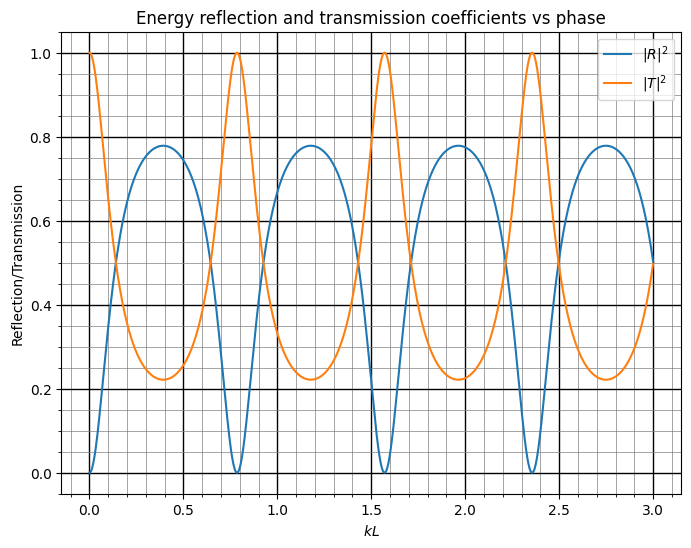

In [6]:
plt.figure(figsize=(8,6))

plt.plot(grid_real, np.abs(reflection_coef(grid_real) ** 2), color = 'C0', label = '$|R|^2$')
plt.plot(grid_real, np.abs(transmission_coef(grid_real) ** 2), color = 'C1', label = '$|T|^2$')

plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='black', linewidth=1)
plt.grid(which='minor', color='grey', linewidth=0.5)

plt.title('Energy reflection and transmission coefficients vs phase')
plt.xlabel('$kL$')
plt.ylabel('Reflection/Transmission')
plt.legend()

plt.show()

Poles computation

In [7]:
def det_S(phi):
    return reflection_coef(phi) ** 2 - transmission_coef(phi) ** 2

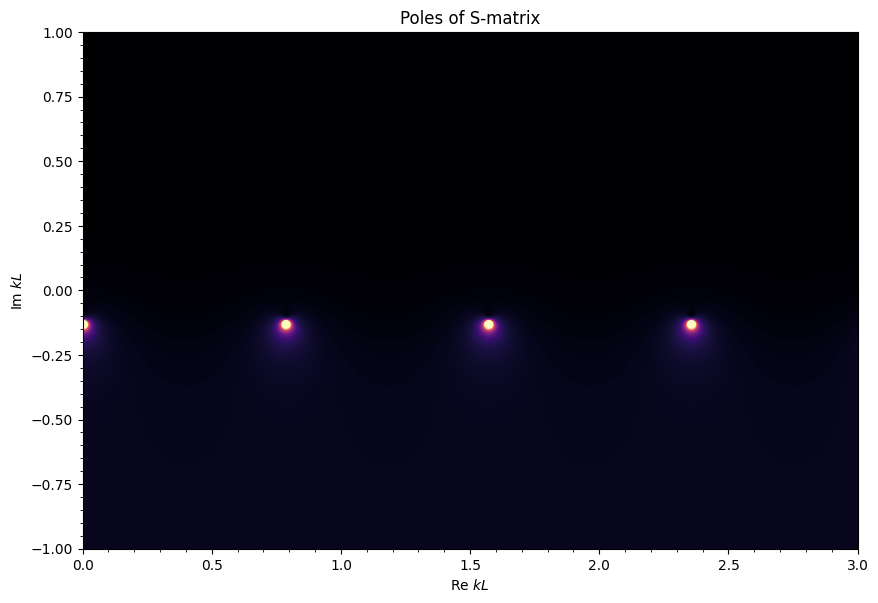

In [8]:
plt.figure(figsize=(10, 8))

z = abs(det_S(grid))
#print(z)
plt.imshow(z, cmap='magma', vmin=0, vmax=50, origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])

plt.minorticks_on()

plt.title('Poles of S-matrix')
plt.xlabel('Re $kL$')
plt.ylabel('Im $kL$')

plt.show()

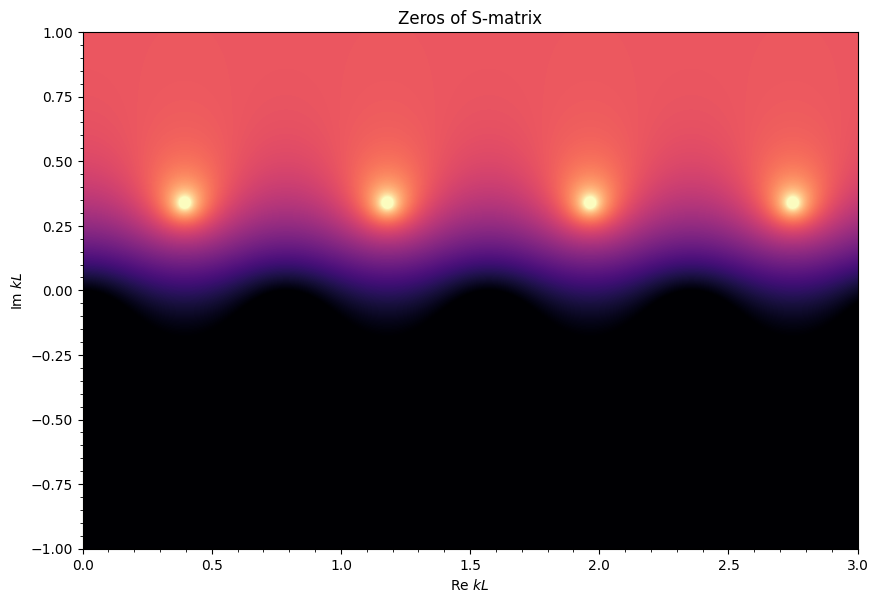

In [9]:
plt.figure(figsize=(10, 8))

z = np.abs(reflection_coef(grid) - transmission_coef(grid))
#print(z)
plt.imshow(np.log(1/z), cmap='magma', vmin=0, vmax=5, origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])

plt.minorticks_on()

plt.title('Zeros of S-matrix')
plt.xlabel('Re $kL$')
plt.ylabel('Im $kL$')

plt.show()

### Oblique incidence

Parallel component of $k$

In [10]:
phi_par = 2

New grid

In [11]:
grid_real = np.linspace(0, 4, 2000)
grid_imaginary_pos = np.linspace(0, 0.5, 1000)
grid_imaginary_neg = np.linspace(-0.5, 0, 1000)

grid_imaginary = np.concatenate((grid_imaginary_neg, grid_imaginary_pos))
#print(grid_imaginary[1000])

grid_re, grid_im = np.meshgrid(grid_real, grid_imaginary)
grid = grid_re + 1.j * grid_im

np.isnan(grid).sum()

0

#### Normal component of $k$

Outside

In [12]:
def phi_z(phi):
    return np.sqrt(phi**2 - phi_par**2)

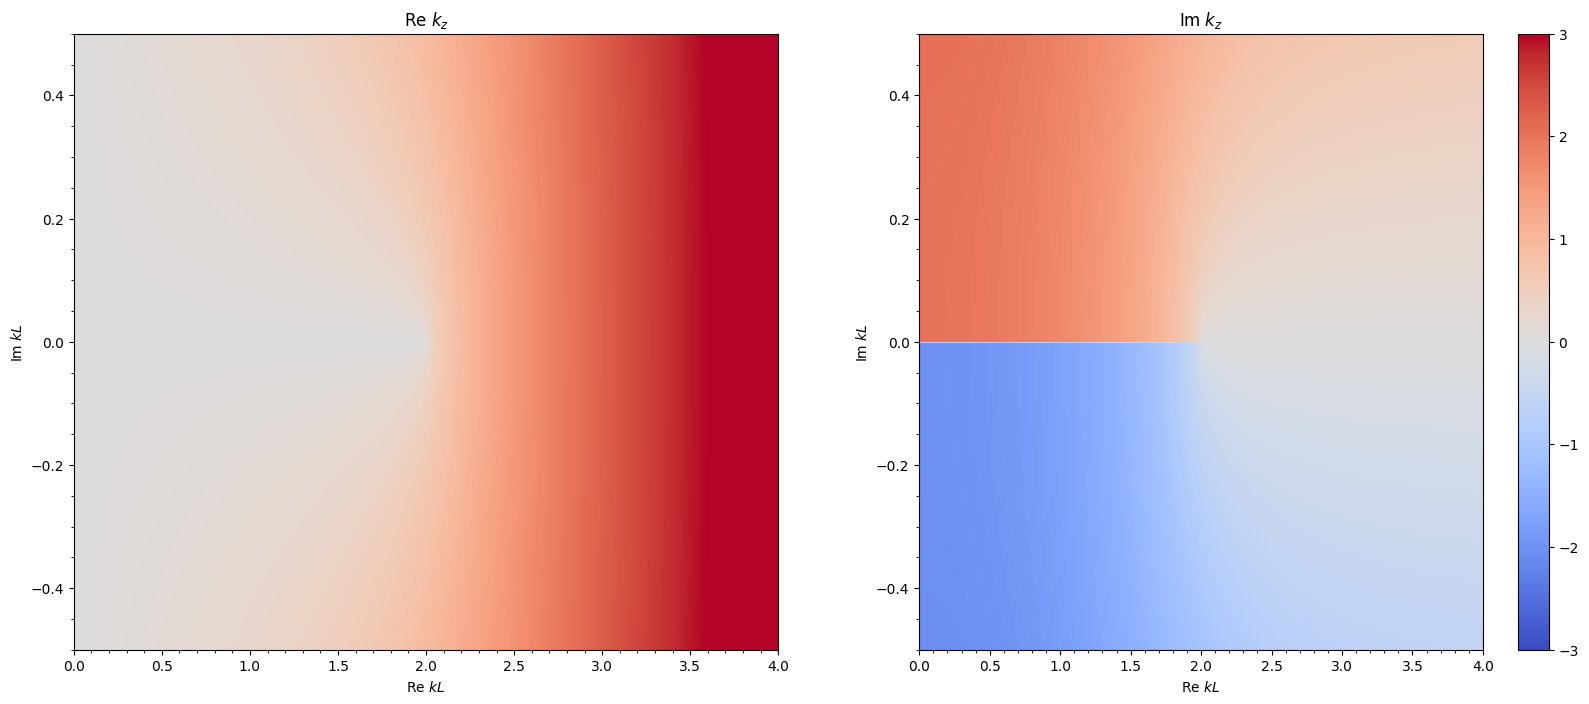

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

#print(z)
pl=axs[0].imshow(np.real(phi_z(grid)), cmap='coolwarm', origin='lower', aspect='auto', vmin=-3, vmax=3, extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[0].set_title('Re $k_z$')
axs[0].set_xlabel('Re $kL$')
axs[0].set_ylabel('Im $kL$')
axs[0].minorticks_on()

axs[1].imshow(np.imag(phi_z(grid)), cmap='coolwarm', origin='lower', aspect='auto', vmin=-3, vmax=3, extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[1].set_title('Im $k_z$')
axs[1].set_xlabel('Re $kL$')
axs[1].set_ylabel('Im $kL$')
axs[1].minorticks_on()
fig.colorbar(pl, ax=axs[1])

plt.show()

Inside film

In [14]:
def phi_z2(phi):
    return np.sqrt((n * phi)**2 - phi_par**2)

Reflection coefficient of an interface TE

In [15]:
def refl_s(phi):
    return (phi_z(phi) - phi_z2(phi)) / (phi_z2(phi) + phi_z(phi))

Reflection and transmission coefficients of the film

In [16]:
def reflection_coef_s(phi):
    return refl_s(phi) * (1 - np.exp(1.j * 2 * n * phi_z2(phi))) / (1 - (refl_s(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))

def transmission_coef_s(phi):
    return (1 - refl_s(phi) ** 2) / (1 - (refl_s(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))

S-matrix determinant

In [17]:
def det_S_TE(phi):
    return reflection_coef_s(phi) ** 2 - transmission_coef_s(phi) ** 2

/tmp/ipykernel_39701/2825689554.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(phi**2 - phi_par**2)
/tmp/ipykernel_39701/328052582.py:2: RuntimeWarning: invalid value encountered in divide
  return refl_s(phi) * (1 - np.exp(1.j * 2 * n * phi_z2(phi))) / (1 - (refl_s(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))
/tmp/ipykernel_39701/328052582.py:5: RuntimeWarning: invalid value encountered in divide
  return (1 - refl_s(phi) ** 2) / (1 - (refl_s(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))


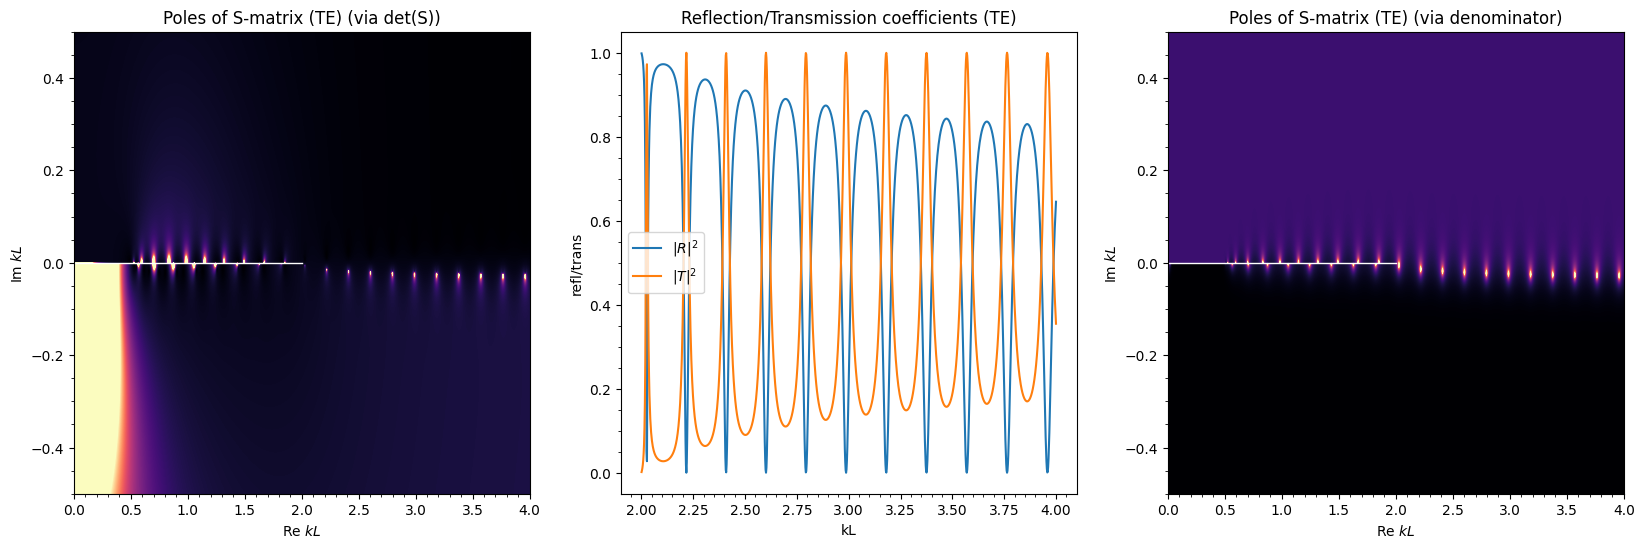

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

z = abs(det_S_TE(grid))
#print(z)
axs[0].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=20), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[0].plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
axs[0].set_title('Poles of S-matrix (TE) (via det(S))')
axs[0].set_xlabel('Re $kL$')
axs[0].set_ylabel('Im $kL$')
axs[0].minorticks_on()

axs[1].plot(grid_real, np.abs(reflection_coef_s(grid_real) ** 2), color = 'C0', label = '$|R|^2$')
axs[1].plot(grid_real, np.abs(transmission_coef_s(grid_real) ** 2), color = 'C1', label = '$|T|^2$')
axs[1].legend()
axs[1].set_title('Reflection/Transmission coefficients (TE)')
axs[1].set_xlabel('kL')
axs[1].set_ylabel('refl/trans')
axs[1].minorticks_on()

z1 = abs(1 - (refl_s(grid) ** 2) * np.exp(1.j * 2 * n * phi_z2(grid))) ** -1
#print(z)
axs[2].imshow(z1, cmap='magma', norm=plt.Normalize(vmin=0, vmax=5), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[2].plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
axs[2].set_title('Poles of S-matrix (TE) (via denominator)')
axs[2].set_xlabel('Re $kL$')
axs[2].set_ylabel('Im $kL$')
axs[2].minorticks_on()

plt.show()

TM

In [19]:
def refl_p(phi):
    return (phi_z2(phi) / n**2 - phi_z(phi)) / (phi_z2(phi) / n**2 + phi_z(phi))

In [20]:
def reflection_coef_p(phi):
    return refl_p(phi) * (1 - np.exp(1.j * 2 * n * phi_z2(phi))) / (1 - (refl_p(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))

def transmission_coef_p(phi):
    return (1 - refl_p(phi) ** 2) / (1 - (refl_p(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))

In [21]:
def det_S_TM(phi):
    return reflection_coef_p(phi) ** 2 - transmission_coef_p(phi) ** 2

/tmp/ipykernel_39701/1379268135.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((n * phi)**2 - phi_par**2)
/tmp/ipykernel_39701/1657818535.py:2: RuntimeWarning: invalid value encountered in divide
  return refl_p(phi) * (1 - np.exp(1.j * 2 * n * phi_z2(phi))) / (1 - (refl_p(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))
/tmp/ipykernel_39701/1657818535.py:5: RuntimeWarning: invalid value encountered in divide
  return (1 - refl_p(phi) ** 2) / (1 - (refl_p(phi) ** 2) * np.exp(1.j * 2 * n * phi_z2(phi)))


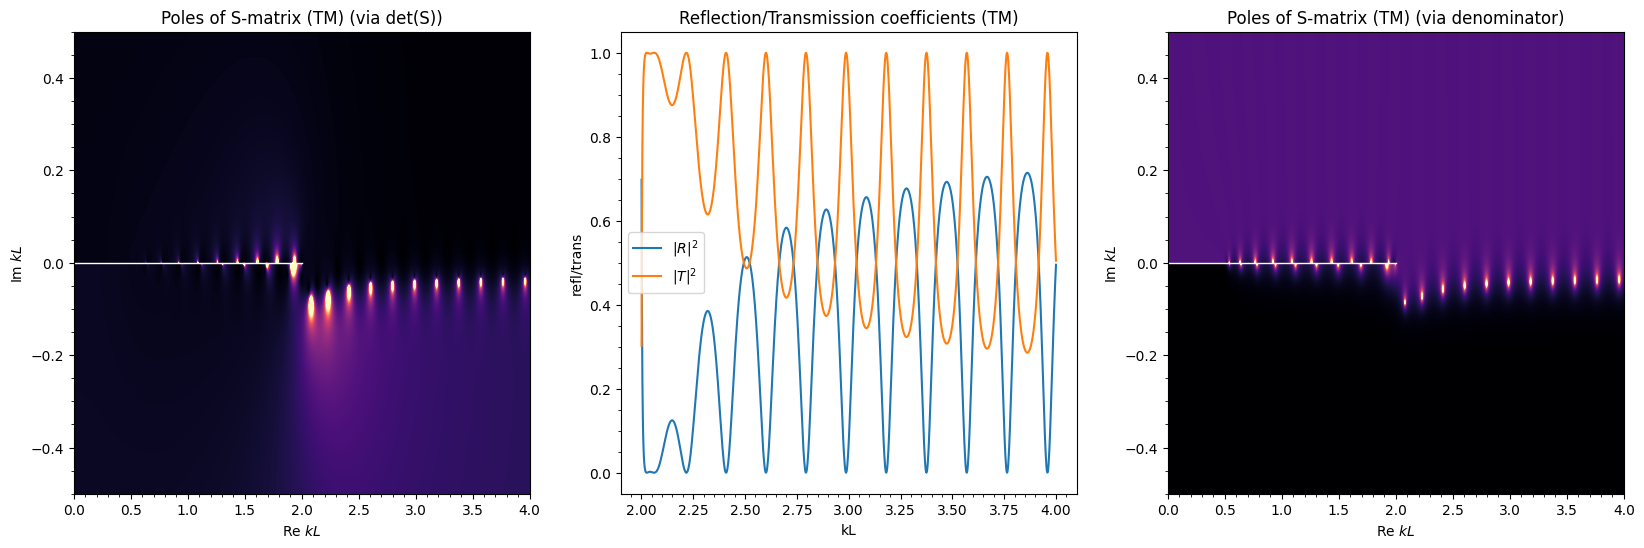

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

z = abs(det_S_TM(grid))
#print(z)
axs[0].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=20), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[0].plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
axs[0].set_title('Poles of S-matrix (TM) (via det(S))')
axs[0].set_xlabel('Re $kL$')
axs[0].set_ylabel('Im $kL$')
axs[0].minorticks_on()

axs[1].plot(grid_real, np.abs(reflection_coef_p(grid_real) ** 2), color = 'C0', label = '$|R|^2$')
axs[1].plot(grid_real, np.abs(transmission_coef_p(grid_real) ** 2), color = 'C1', label = '$|T|^2$')
axs[1].legend()
axs[1].set_title('Reflection/Transmission coefficients (TM)')
axs[1].set_xlabel('kL')
axs[1].set_ylabel('refl/trans')
axs[1].minorticks_on()

z1 = abs(1 - (refl_p(grid) ** 2) * np.exp(1.j * 2 * n * phi_z2(grid))) ** -1
#print(z)
axs[2].imshow(z1, cmap='magma', norm=plt.Normalize(vmin=0, vmax=4), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[2].plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
axs[2].set_title('Poles of S-matrix (TM) (via denominator)')
axs[2].set_xlabel('Re $kL$')
axs[2].set_ylabel('Im $kL$')
axs[2].minorticks_on()

plt.show()

### Some calculations

In [23]:
import sympy as sym

In [24]:
def kz(phi):
    return sym.sqrt(phi**2 - phi_par**2)

In [25]:
def kz_2(z):
    return sym.sqrt((n * z)**2 - phi_par**2)

In [26]:
def ref(phi):
    return (kz_2(phi) - kz(phi)) / (kz_2(phi) + kz(phi))

In [27]:
z = sym.symbols('z')
sym.nsolve(1 - (ref(z) ** 2) * sym.exp(1.j * 2 * n * kz_2(z)), z, 1.6 + 0.1* 1.j)

ValueError: Could not find root within given tolerance. (2.57653931016247167743e+22 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.